In [1]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 加载模型
model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

In [3]:
word_embeddings = model.vectors
words = model.index_to_key

In [4]:
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(word_embeddings)

In [129]:
# 找到词语的位置
word = words.index("intermediate")
# interphases
# interfacial
# interface

In [130]:
# 计算 "perovskite" 与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[word]])

In [127]:
# word1_index = words.index("aminoguanidine")
# # word2_index = words.index("interface")

# # 可视化词向量图
# plt.figure(figsize=(10, 8))

# # 根据余弦相似性调整颜色深浅并绘制散点图
# colors = plt.cm.Blues(cosine_similarities.ravel())  # 将二维数组展平为一维，并根据余弦相似性设置颜色深浅
# plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=colors, alpha=0.5)

# # # 只显示余弦相似性大于0.5的点
# # threshold_similarity = 0.55
# # for i, similarity in enumerate(cosine_similarities):
# #     if similarity > threshold_similarity:
# #         plt.scatter(tsne_embeddings[i, 0], tsne_embeddings[i, 1], c='violet', alpha=0.5)


# plt.scatter(tsne_embeddings[word1_index, 0], tsne_embeddings[word1_index, 1], c='red', marker='*', s=100, label='aminoguanidine')

# # plt.scatter(tsne_embeddings[word2_index, 0], tsne_embeddings[word2_index, 1], c='green', marker='^', s=100, label='additive')

# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity (Cosine Similarity > 0.5)')
# plt.legend()

# # 添加颜色条
# cbar = plt.colorbar()
# cbar.set_label('Cosine Similarity')
# # plt.axis([-100, 100, -60, 60])
# plt.savefig('ETL_solvent.png')  # 可以将文件名修改为您想要的文件名和路径

# plt.show()


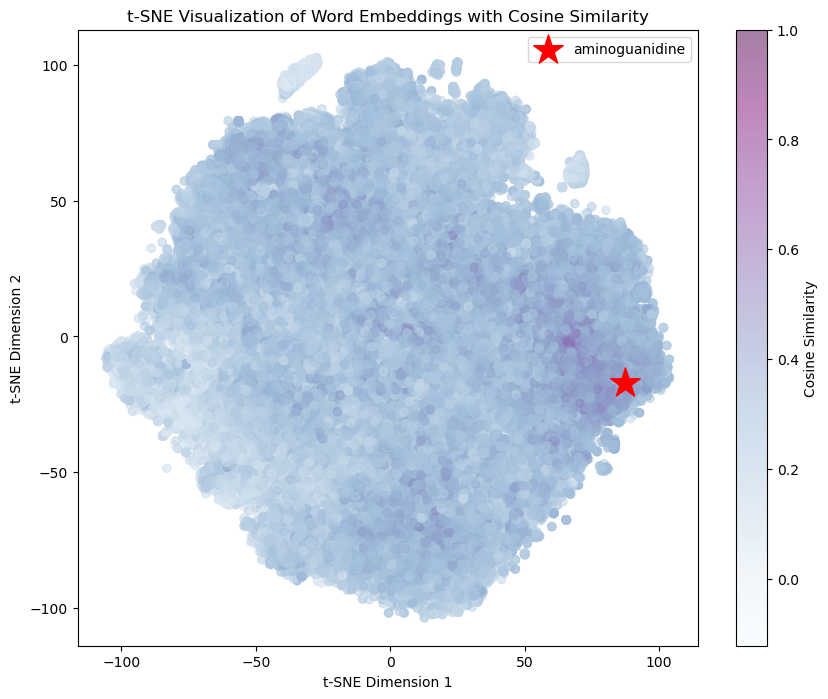

In [131]:
# 找到 "aminoguanidine" 和 "additive" 的位置
word1_index = words.index("aminoguanidine")
# word2_index = words.index("additive")

# 设置颜色映射，让余弦相似度值越大颜色越蓝
cmap = plt.cm.BuPu
# "Blues": 蓝色调的单色调颜色映射。
# "Greens": 绿色调的单色调颜色映射。
# "Reds": 红色调的单色调颜色映射。
# "Oranges": 橙色调的单色调颜色映射。
# "Purples": 紫色调的单色调颜色映射。
# "Greys": 灰度的单色调颜色映射。
# "BuPu": 蓝紫色渐变的渐变色颜色映射。
# "YlOrRd": 黄至橙至红的渐变色颜色映射。
# "viridis": 从深蓝到亮黄的渐变色颜色映射，被认为是色盲友好的颜色映射。
# "inferno": 从黑色到红色的渐变色颜色映射。
# "magma": 从黑色到紫色的渐变色颜色映射。
# "plasma": 从黑色到品红的渐变色颜色映射。
# "cividis": 从深蓝到黄色的渐变色颜色映射，也是色盲友好的颜色映射。
# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记 "aminoguanidine" 和 "additive"
plt.scatter(tsne_embeddings[word1_index, 0], tsne_embeddings[word1_index, 1], c='red', marker='*', s=500, label='aminoguanidine')
# plt.scatter(tsne_embeddings[word2_index, 0], tsne_embeddings[word2_index, 1], c='green', marker='^', s=500, label='additive')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')
plt.legend()

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])

plt.savefig('intermediate.png')  # 可以将文件名修改为您想要的文件名和路径

plt.show()



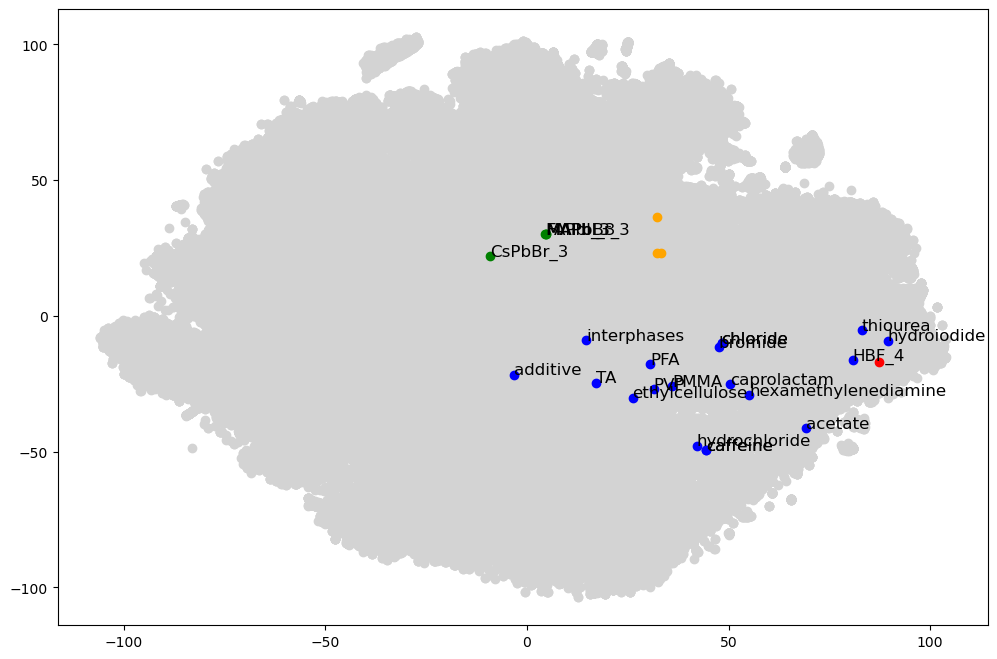

In [87]:
# 游老师那边的smart guess
word_vectors = {}
for i, word in enumerate(model.index_to_key):
    word_vectors[word] = model.get_vector(word)
    
plt.figure(figsize=(12, 8))
dpi=2000
# 绘制除高亮词汇外的点
plt.scatter(tsne_embeddings [:, 0], tsne_embeddings [:, 1], color='lightgray')

# 定义不同集合的高亮词汇和颜色
# highlight_words_blue = ['decane','Butane','hexamethylenediamine','octane','chloride','bromide','chloride','hydroiodide','acetamide','formamide','HBF_4','hydrochloride','acetate','water','caffeine','caprolactam','ethylcellulose','Formamide',] 
highlight_words_blue = ['interphases','additive','TA','PMMA','caffeine','thiourea','PVP','PFA','hexamethylenediamine','chloride','bromide','chloride','hydroiodide','HBF_4','hydrochloride','acetate','caffeine','caprolactam','ethylcellulose'] 
# 添加剂，KI，NaF，ZnCl2,MgI2,NiCl2,Trimesic acid (TA),Ethyl cellulose (EC),Poly(methyl methacrylate) (PMMA),Caffeine,DR3T,
highlight_words_red = ['aminoguanidine',]  # 红色高亮词汇
highlight_words_yellow = []  # 黄色高亮词汇 有机无机杂化钙钛矿
highlight_words_green = ['FAPbI_3','MAPbI_3','MAPbBr_3','CsPbBr_3'] 
highlight_words_orange = ['SnO_2','Nb_2O_5','LiF'] #
# highlight_words_orange = ['SiO_2','MgO','La_2O_3','Cr_2O_3']  
# 遍历蓝色高亮词汇并绘制点
for word in highlight_words_blue:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(tsne_embeddings[index, 0], tsne_embeddings[index, 1], color='blue')
    plt.annotate(word, (tsne_embeddings [index, 0], tsne_embeddings [index, 1]), fontsize=12)
for word in highlight_words_red:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(tsne_embeddings[index, 0], tsne_embeddings[index, 1], color='red')
    # plt.annotate(word, (tsne_embeddings [index, 0], tsne_embeddings [index, 1]), fontsize=12)
for word in highlight_words_green:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(tsne_embeddings[index, 0], tsne_embeddings[index, 1], color='green')
    plt.annotate(word, (tsne_embeddings [index, 0], tsne_embeddings [index, 1]), fontsize=12)
for word in highlight_words_orange:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(tsne_embeddings[index, 0], tsne_embeddings[index, 1], color='orange')
    # plt.annotate(word, (tsne_embeddings [index, 0], tsne_embeddings [index, 1]), fontsize=12)

# plt.xlim(-20,10)
# plt.ylim(0,30)
# plt.rcParams['font.family'] = 'Times New Roman' 
plt.savefig('聚类11smartguess.png')  # 保存为PNG格式
plt.show()

In [45]:
for key, value in model.most_similar('aminoguanidine', topn=100000):
    print(key)

thiocarbohydrazides
S-arylisothiuronium
sodioacetoacetic
p-dimethylaminobenzaldehyde
triaminoguanidine
gramine
2-thiophenealdehyde
3-thiadiazoles
2-formylcyclohexanone
iodomethylates
α-hydrohexafluoroisobutyric
5-nitrofurfural
benzalazine
hexafluoroisobutenylidene
POC1_3
-4-aza-5
ethyldichlorophosphine
iodohydrin
nitrosated
p-phenolatothianium
5-bromoisatin
sulfotrioxidation
p-toluenesulfonyl
3-phenyl-5-
2-dithiolium
perfluorodicarboxylic
ethylcarbonic
5-dicarboxylic
ω-bromoacetophenone
paraldehyde
4-amino-antipyrine
2-acetothienone
Triethyl
2-aminoethylthio
dicyclopentadienylzirconium
indole-3-carboxaldehyde
bispyrylium
brevicarine
ω-aminomethyl
-chlorobenzenesulfonamide
1-cyclohexenyl
bromomalonic
methacrylyl
24-dimethoxybenzaldehyde
diethylcadmium
chlorocarbonate
pyridylethylated
arylisothiocyanates
thioxopyrimidine
-sultone
N-methyl-
N-methylbutyro-
22-dimethyl-3-phenylazirine
1-amino-1-methylethylphosphonic
1-chlorobenzotriazole
3-indolylmethyl
N-phenyl-N-
tetracyanoethylated
5-br